# PLOT MIDC PRICES vs SUMAS PRICES

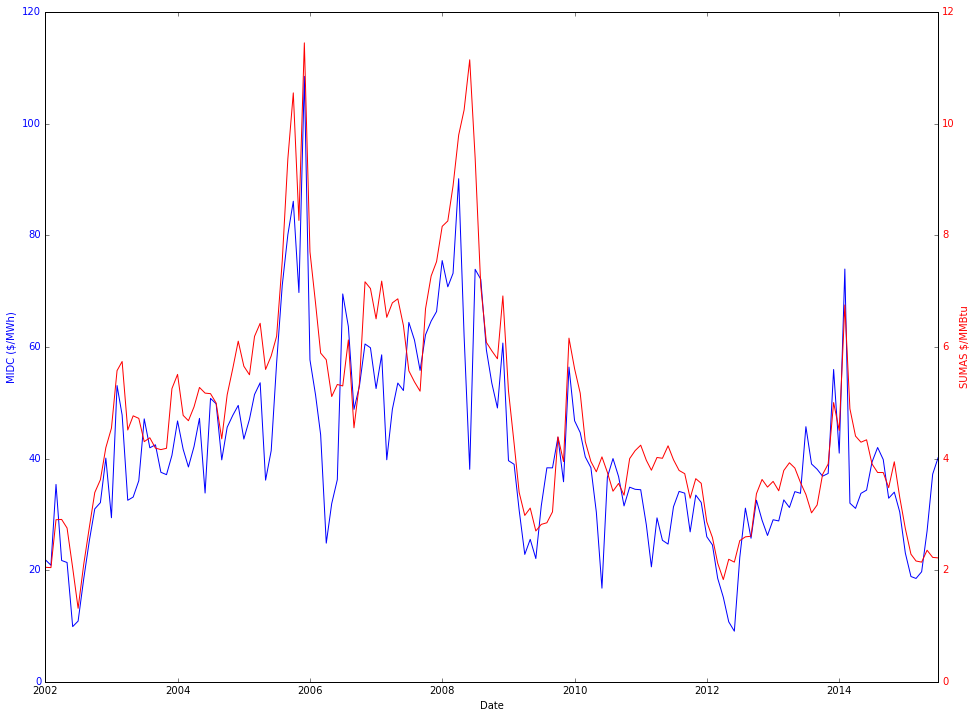

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# read in csv file
df = pd.read_csv('mid_c.csv')

#create arrays of values
Date = pd.to_datetime(pd.Series(df.Date.values)) #need to convert dates from string to datetime
Peak = df.Peak.values
Sumas = df.Sumas.values

#create figure
plt.rcParams['figure.figsize'] = 16, 12
fig, ax1 = plt.subplots()
ax1.plot(Date, Peak, 'b-')
ax1.set_xlabel('Date')
# Make the y1-axis label and tick labels match the line color.
ax1.set_ylabel('MIDC ($/MWh)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

#add a second axis      
ax2 = ax1.twinx()
ax2.plot(Date, Sumas, 'r-')
# Make the y2-axis label and tick labels match the line color.
ax2.set_ylabel('SUMAS $/MMBtu', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')   

#create plot    
plt.show()

Graph appears to show that MIDC and SUMAS prices tend to move together. Will formally check below by running a simple linear regression.

# RUN REGRESSION & PRINT OUTPUTS

In [6]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

#create regression object
rg = linear_model.LinearRegression()

#need to transpose data arrays
X = np.array([Sumas]).T
Y = np.array([Peak]).T

#fit model
rg.fit(X, Y)

# The coefficients
print('Regression Coefficient', rg.coef_)
print('R-Square', r2_score(Y, rg.predict(X)))

Regression Coefficient [[ 7.34963641]]
R-Square 0.741126847346


The regression coefficient B0 is equal to 7.4. Implies that a $1 SUMAS price movement will result in a $7.4 movement
in the MIDC price. sklearn does not have a feature to show T or P values!!!!!!! Should have used statstools!!!!!
I'm assuming that the coefficient estimate is significant.

# PLOT PREDICTED MIDC vs ACTUAL MIDC

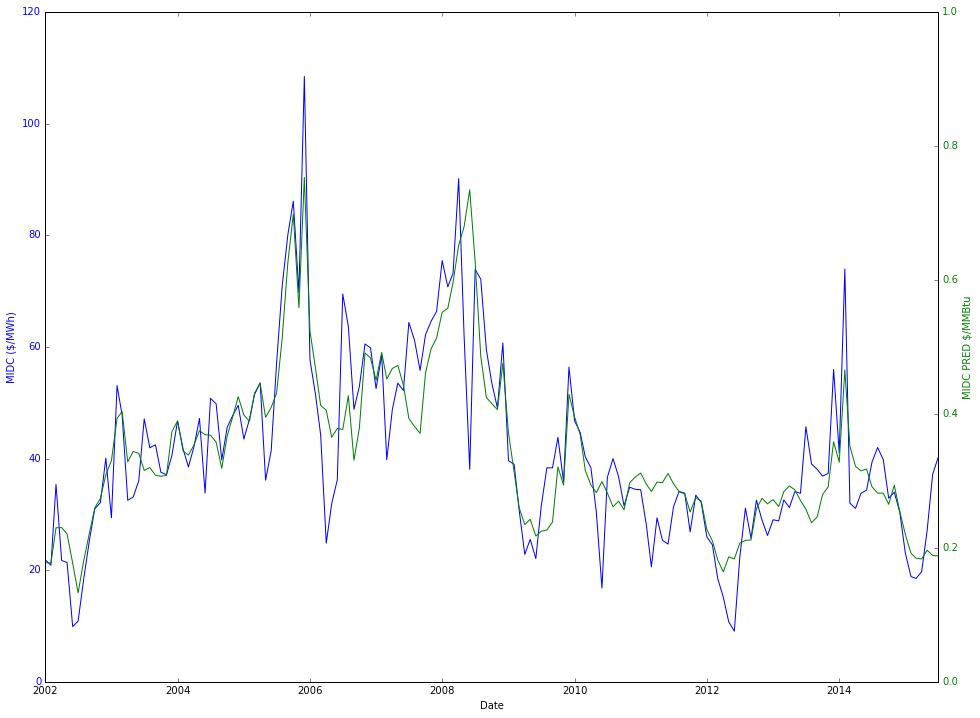

In [7]:
import matplotlib.pyplot as plt2

#create figure
plt2.rcParams['figure.figsize'] = 16, 12
fig, ax1 = plt2.subplots()
ax1.plot(Date, Peak, 'b-')
ax1.set_xlabel('Date')
# Make the y1-axis label and tick labels match the line color.
ax1.set_ylabel('MIDC ($/MWh)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

#add a second axis      
ax2 = ax1.twinx()
ax1.plot(Date, rg.predict(X), 'g-')
# Make the y2-axis label and tick labels match the line color.
ax2.set_ylabel('MIDC PRED $/MMBtu', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')   

#create plot    
plt.show()